# Inferential Statistics (Part 5)

Revision: https://brainalystacademy.com/inferential-statistics-in-python/

# A/B Testing

A/B testing, also known as **split testing** or **bucket testing**, is a fundamental method of comparing **two versions of a single variable** to determine which one performs better based on a specific, measurable goal. It's an essential tool in conversion rate optimization (CRO) and product development.

A/B testing works by showing two variants—Version A (the control) and Version B (the challenger)—to two equally sized, random segments of a target audience simultaneously.

The two versions are identical in every way except for one single element being tested (e.g., a headline, button color, image, or entire page layout).

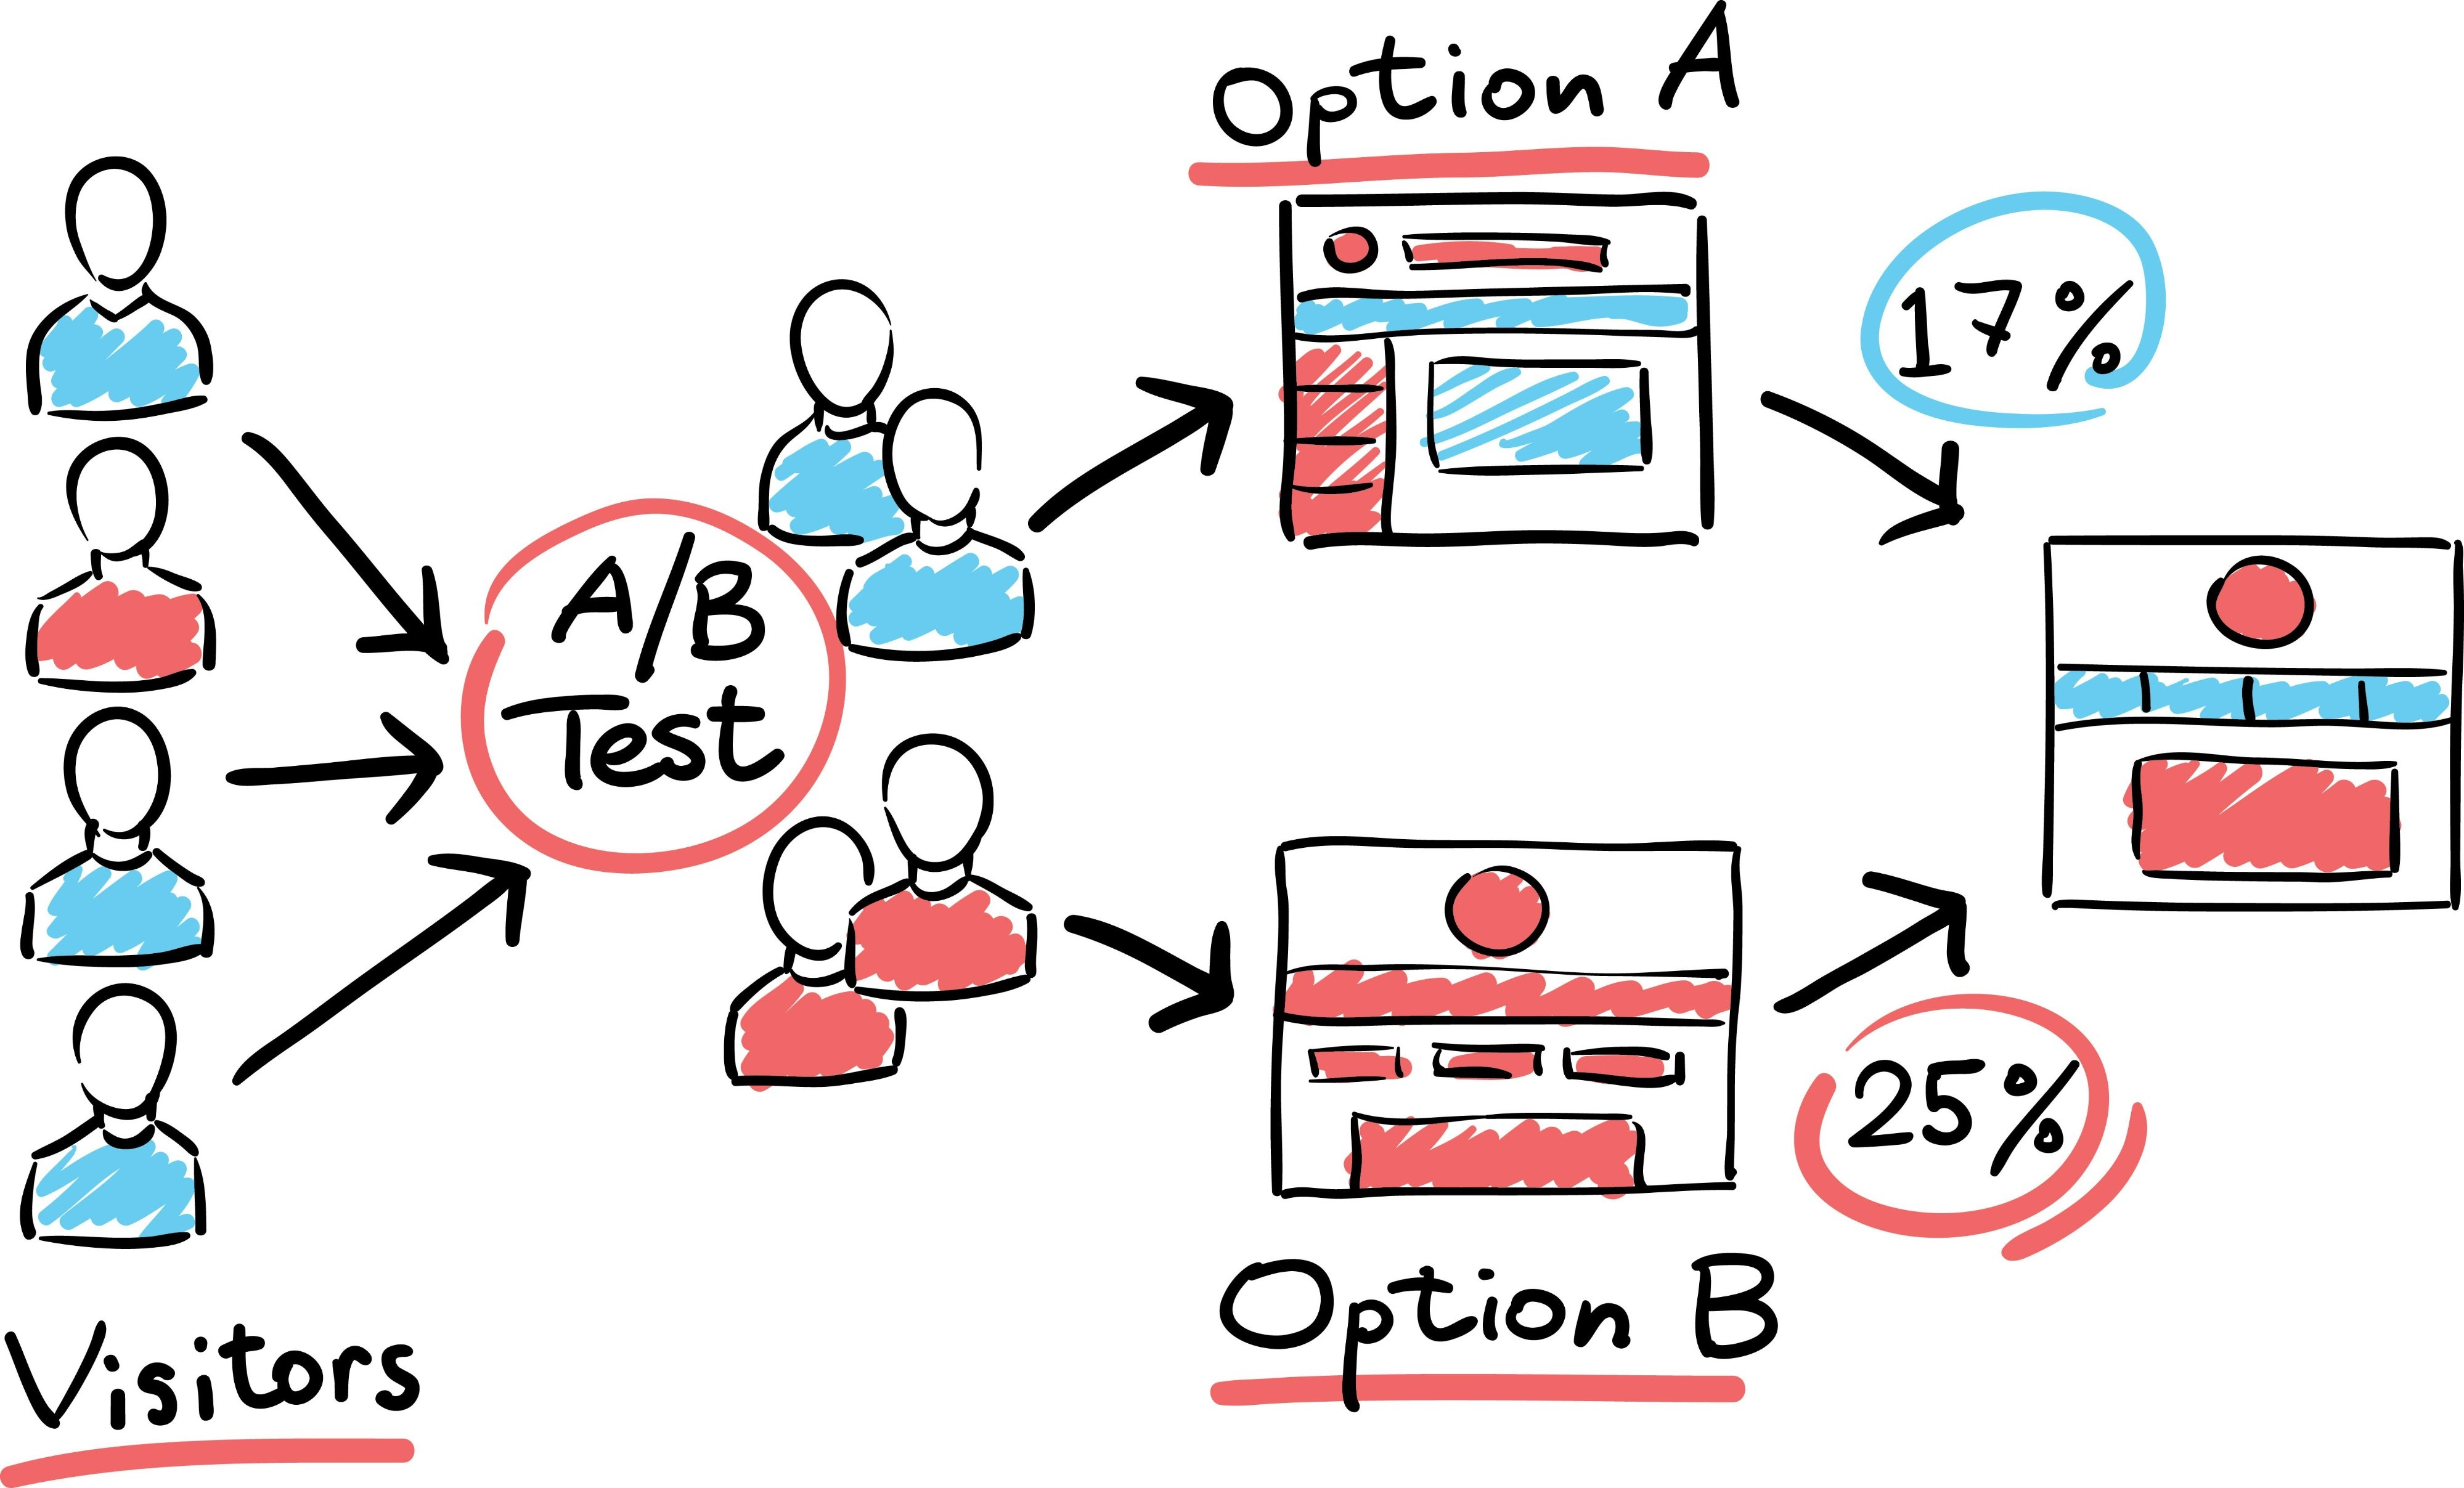

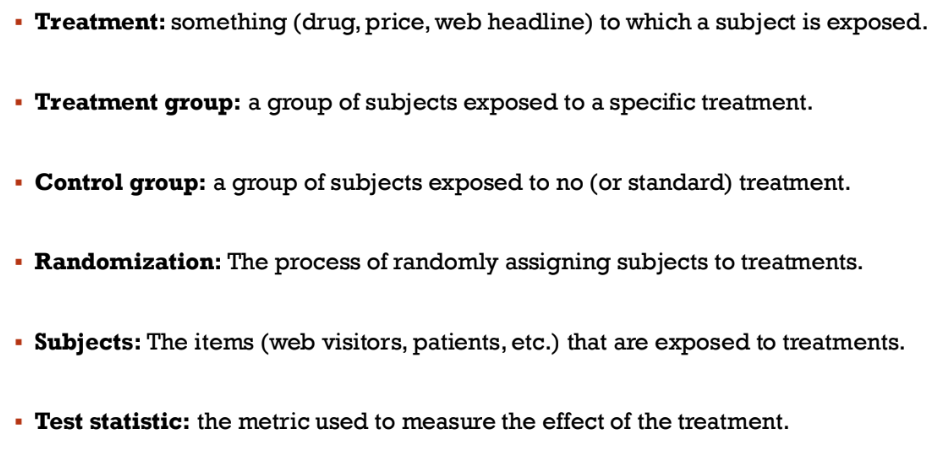

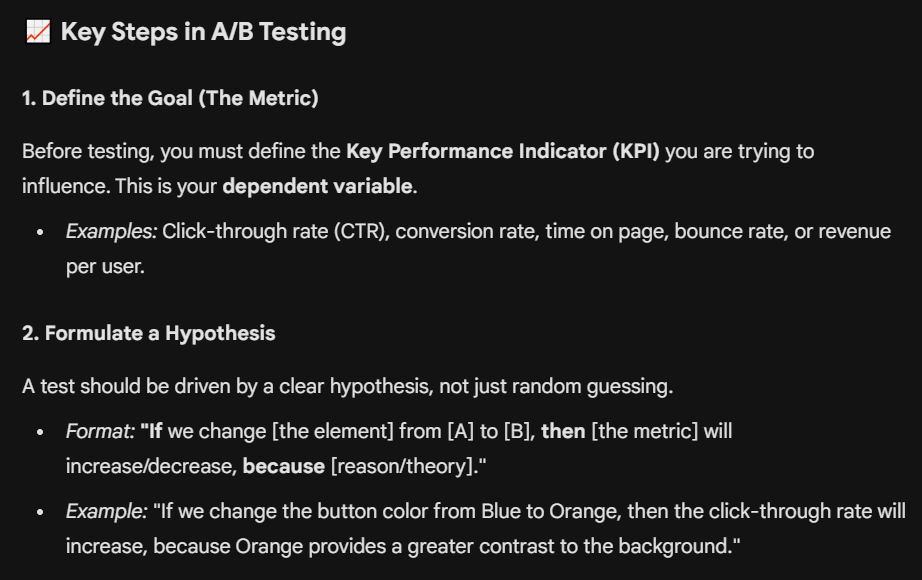

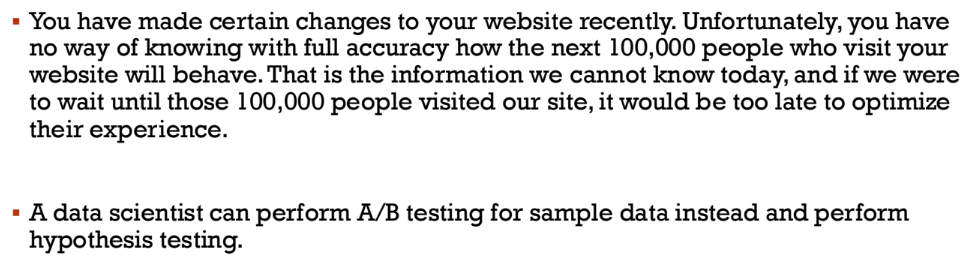

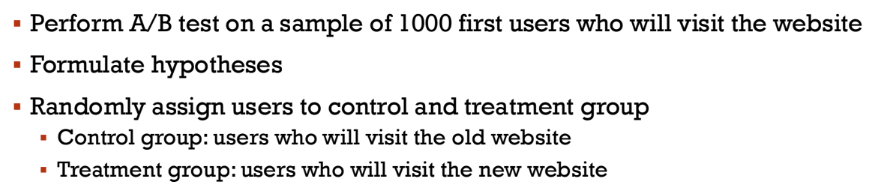

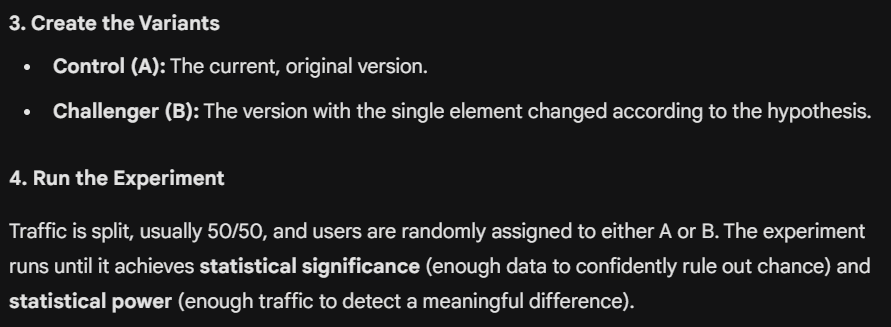

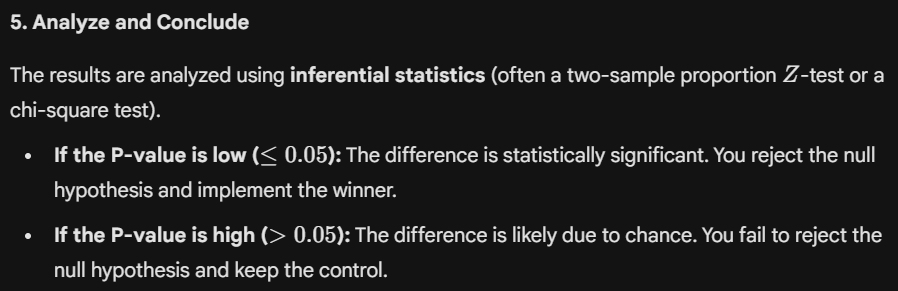

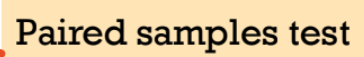

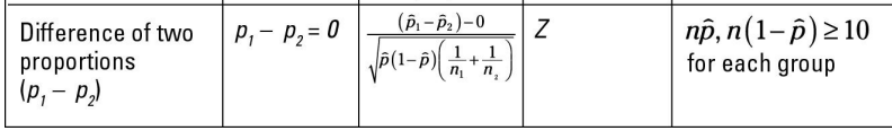

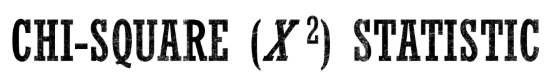

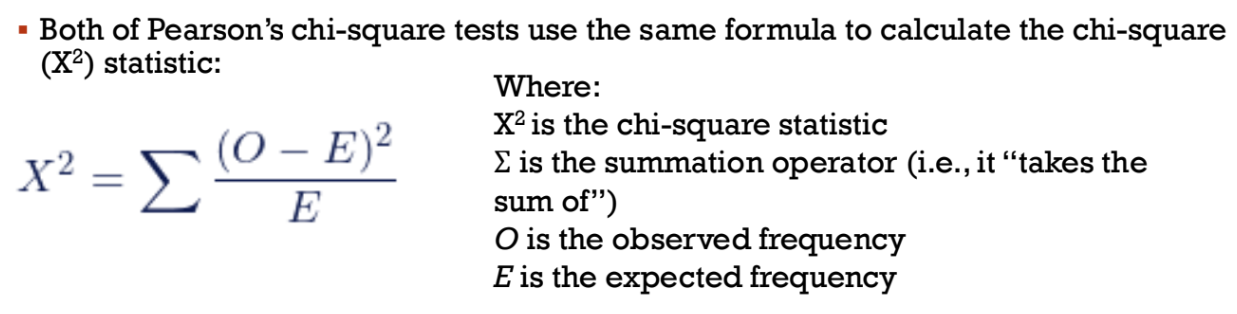

When to use which test:

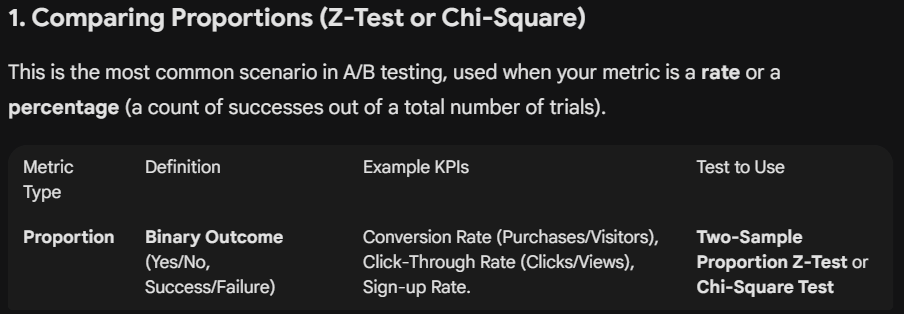

Comparing the conversion rates (proportions) of two independent groups (Version A and Version B) — the **Two-Sample Proportion Z-Test** and the **Chi-Square Test of Independence** are mathematically equivalent and will yield the same statistical conclusion (the same P-value).

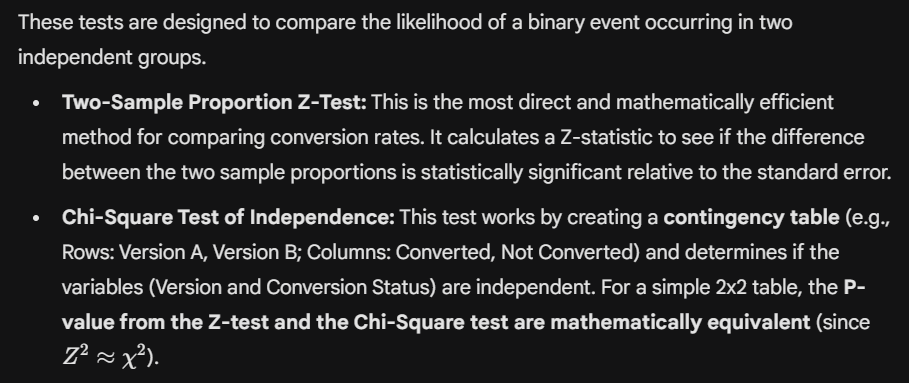

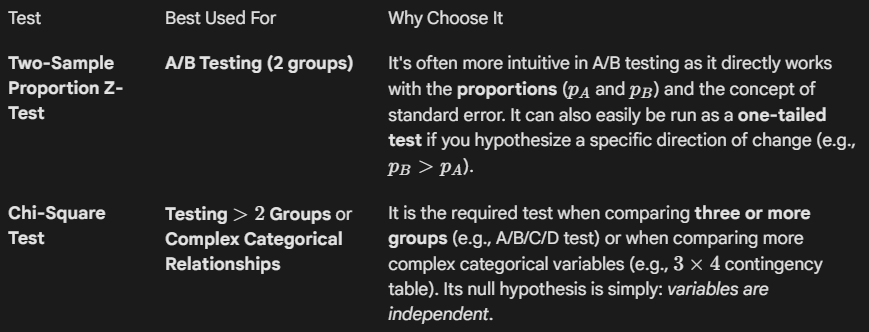

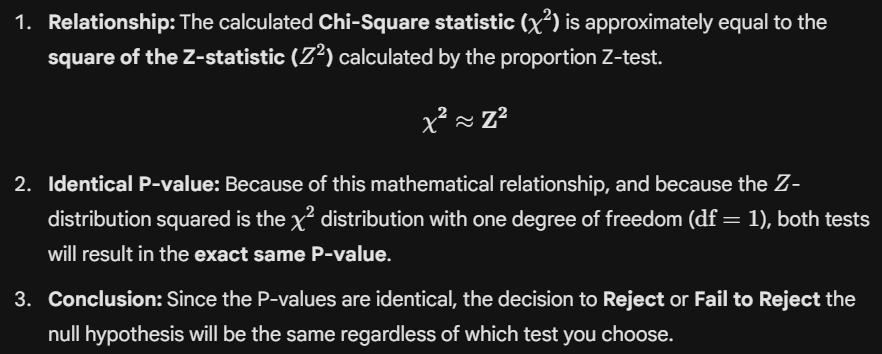

# Bootstrap Sampling

Bootstrap sampling, often simply called bootstrapping, is a powerful, computer-intensive resampling technique used to estimate the sampling distribution of a statistic (like the mean, median, or standard deviation) by drawing numerous resamples with replacement from a single original sample. Sampling with replacement means every observation has an equal chance of being
selected (=1/n), and observations can be selected more than once.

It's essentially a way to use your one sample as a proxy for the entire population to understand the variability and stability of your statistic.

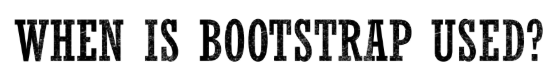


Bootstrapping is primarily used when the assumptions required for traditional parametric methods (like **large sample, normality, or standard error formula is unknown**) are not met.

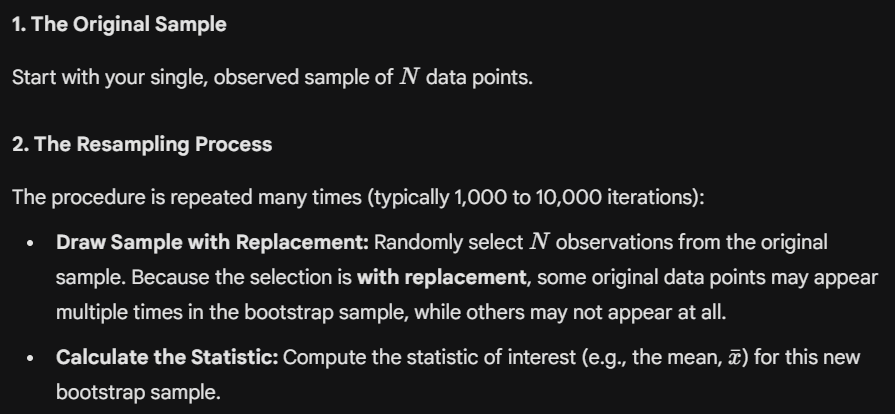

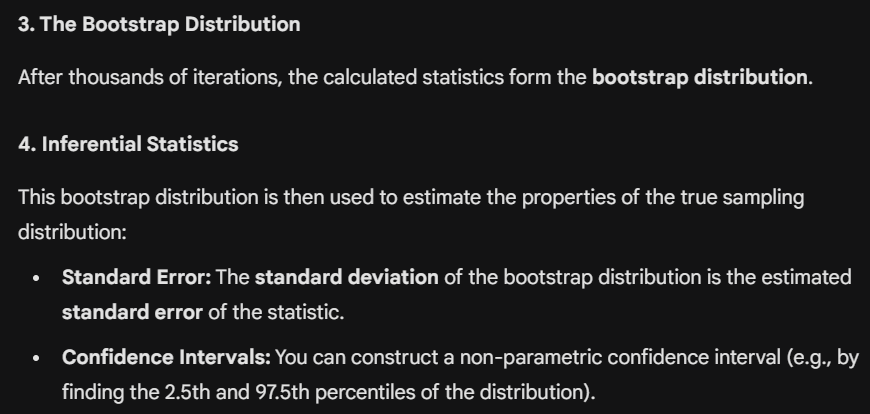

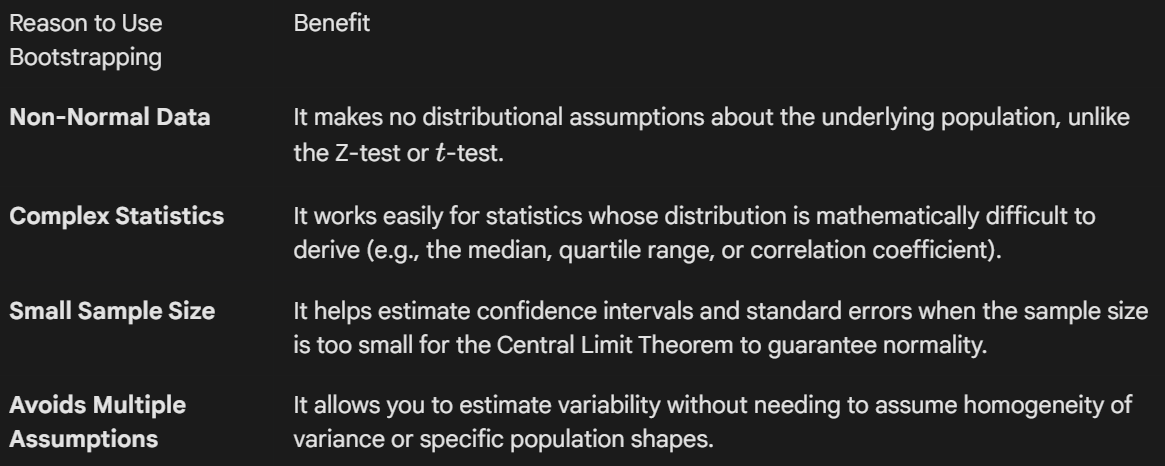

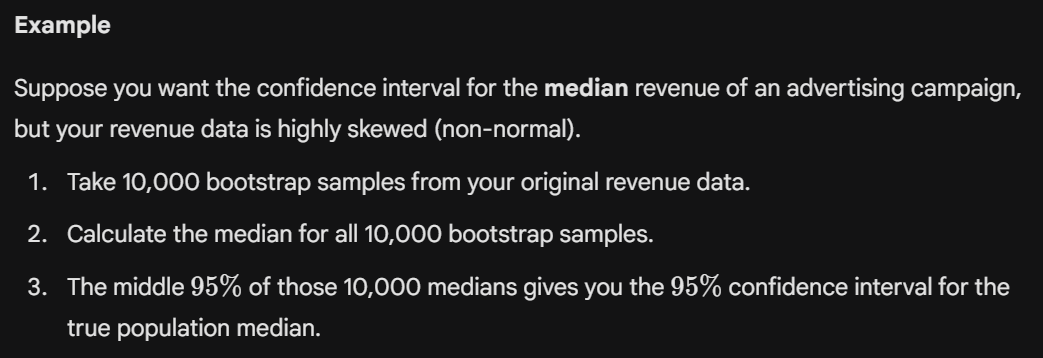

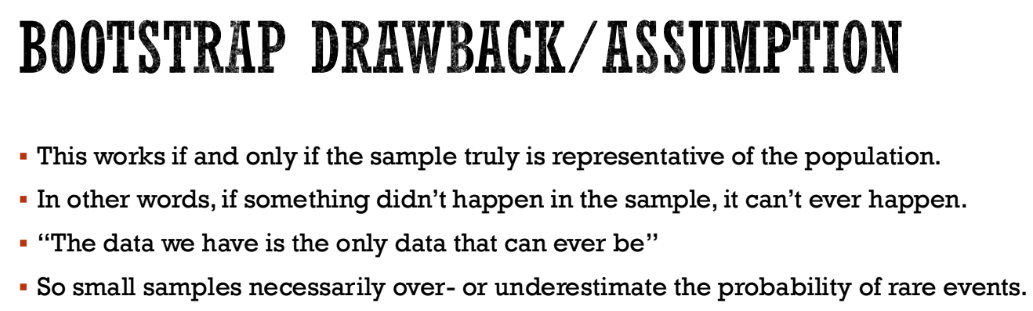

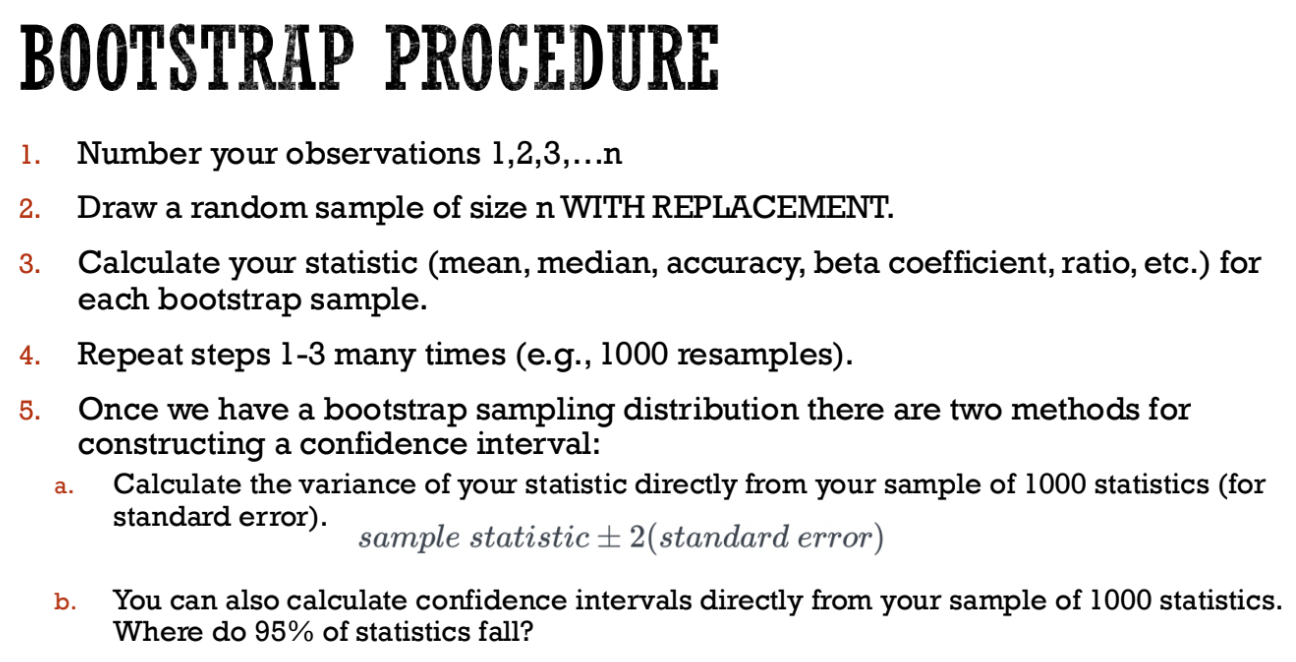

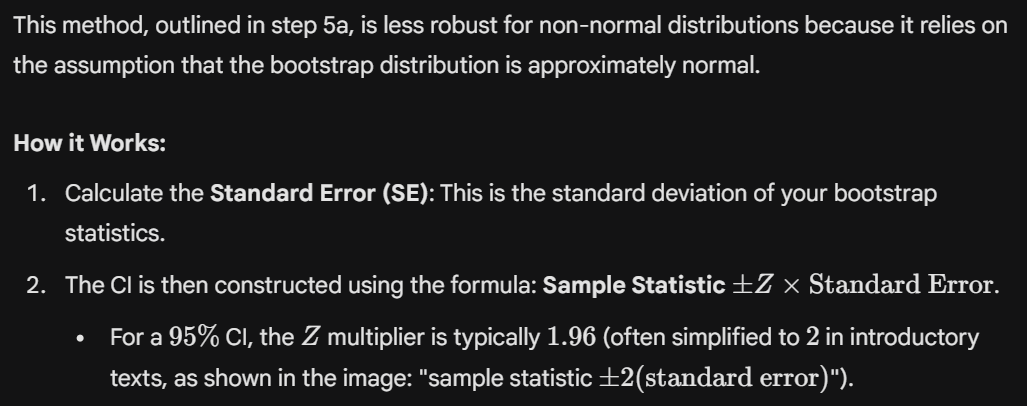

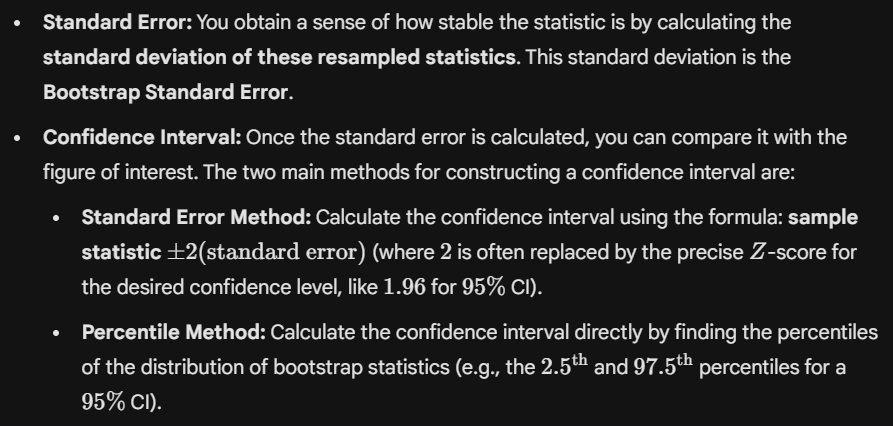

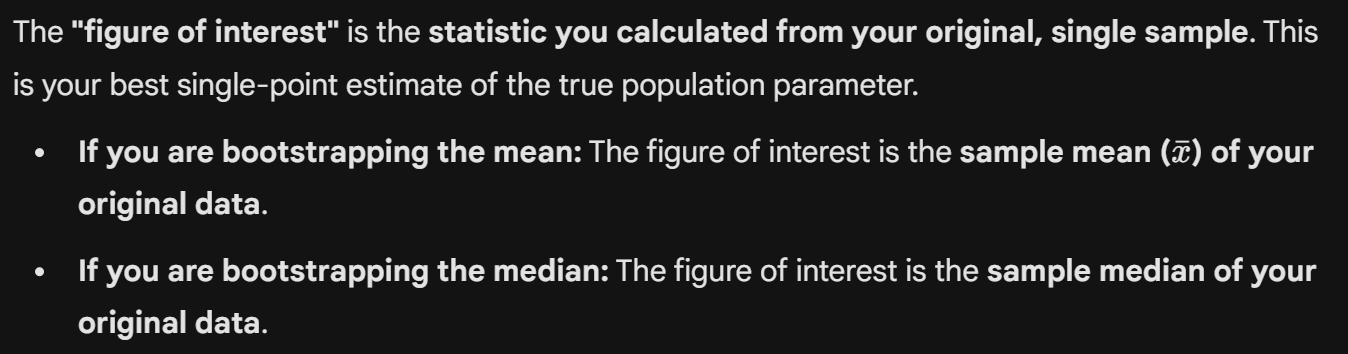

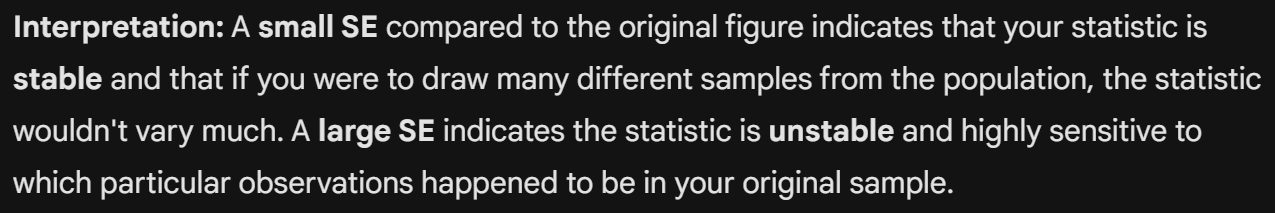

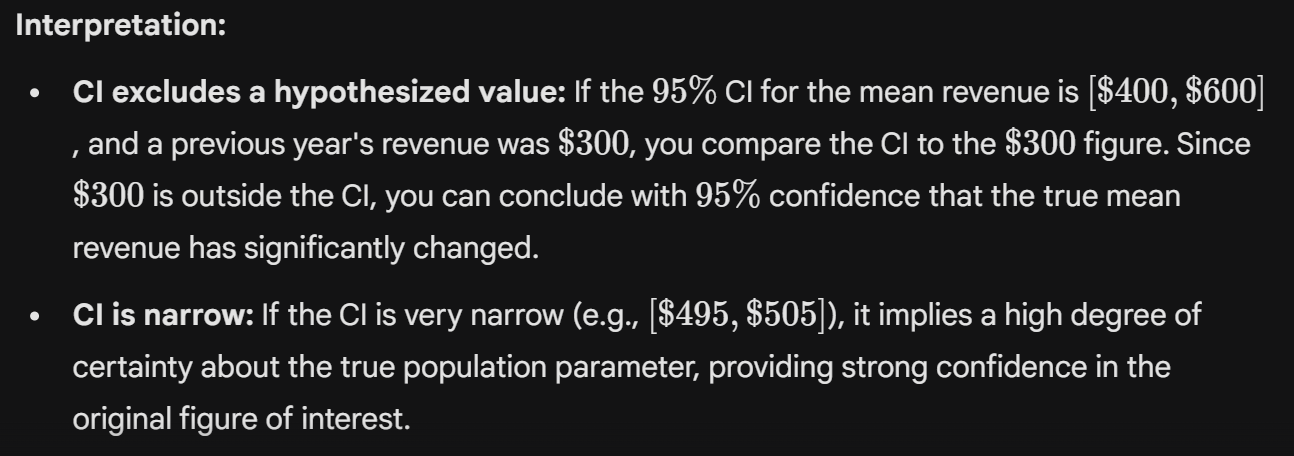

# Covariance

Covariance is a statistical measure that indicates the **directional relationship** between two random variables. It tells you whether two variables tend to move together (i.e., in the same direction) or move in opposite directions.

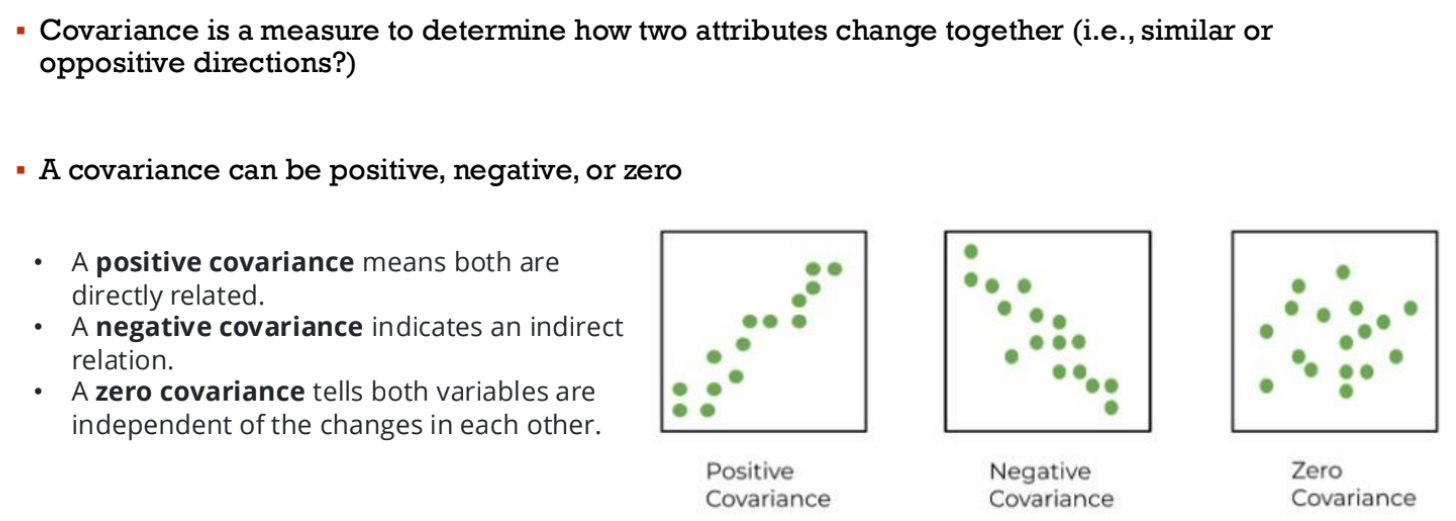

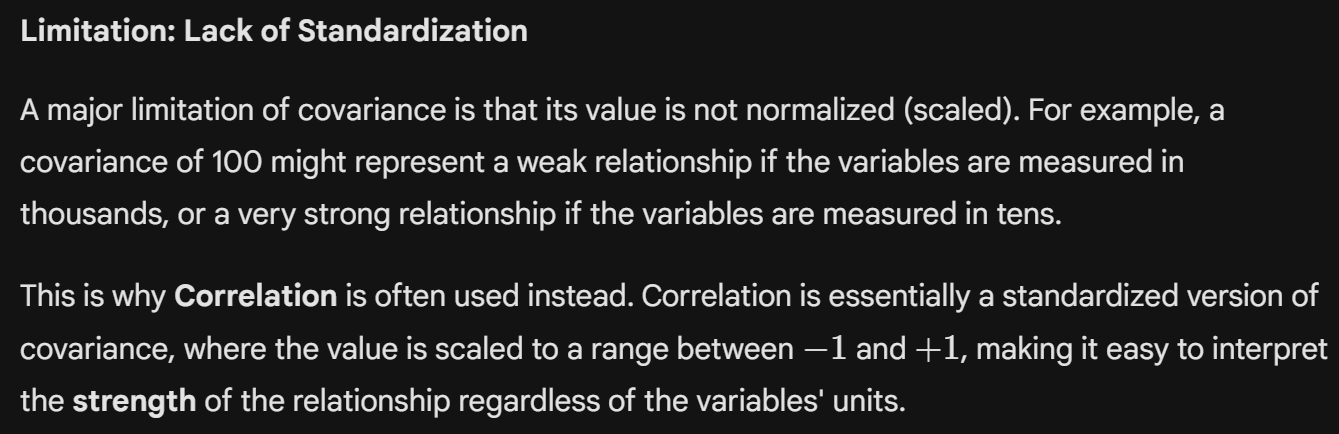

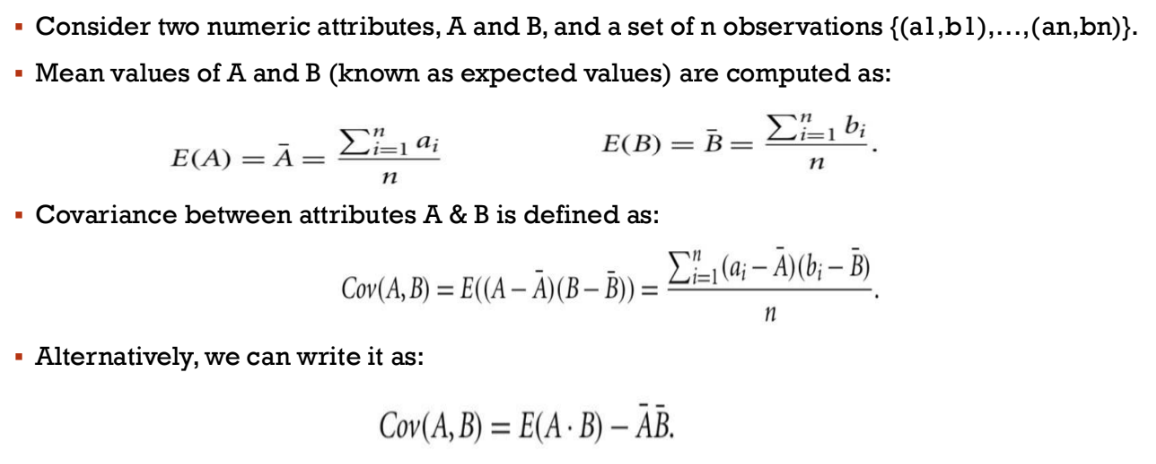

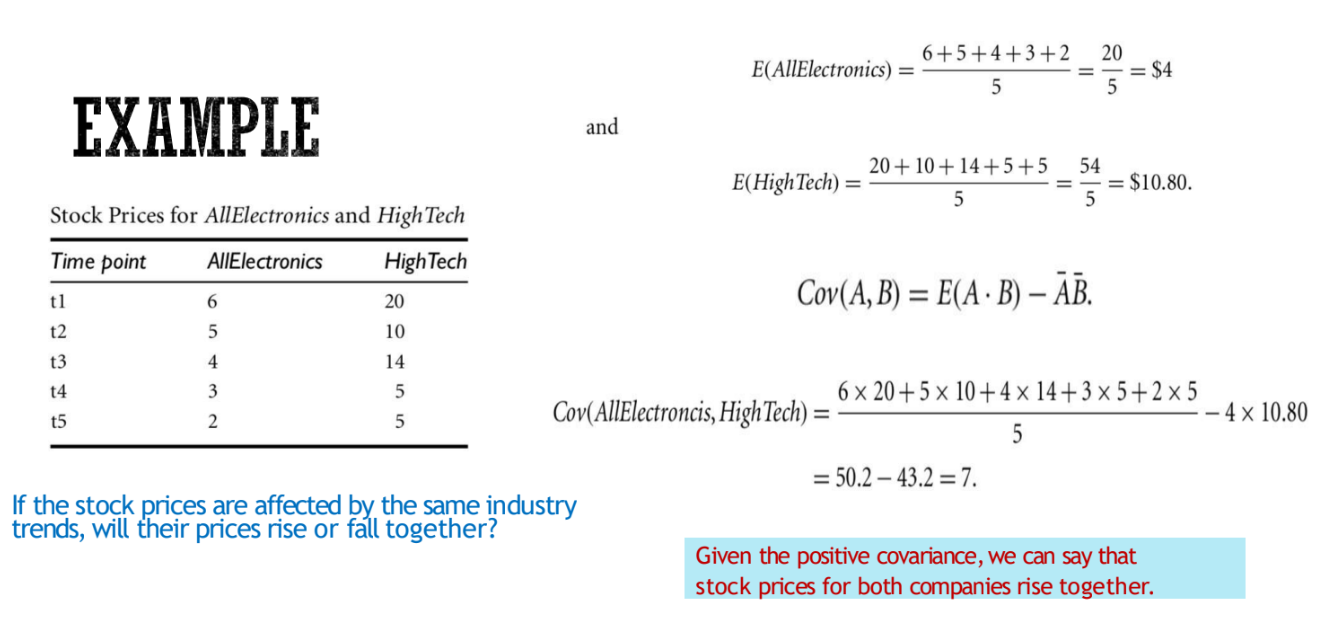

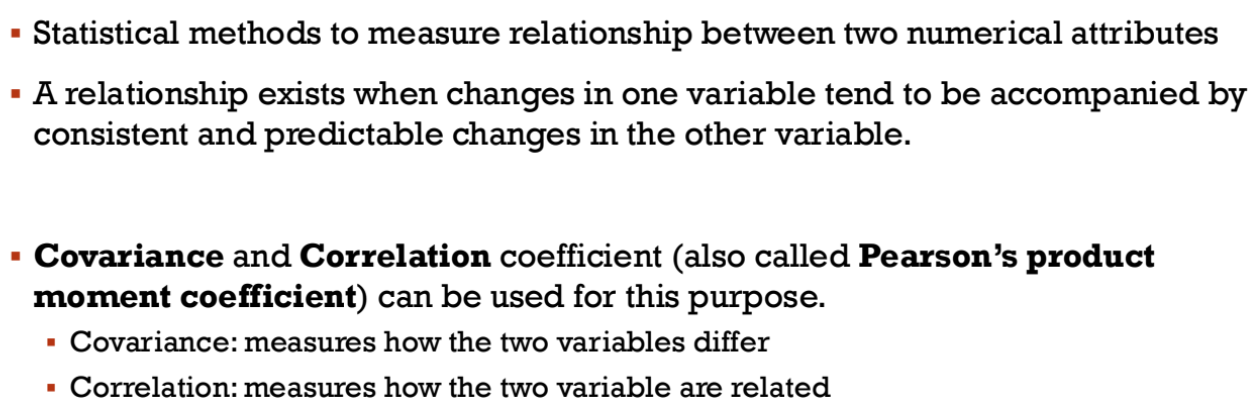

# Correlation

Correlation is a statistical measure that quantifies the **strength** and **direction** of a linear relationship between **two continuous variables** with **different units of measure**.

It is derived from covariance but is **standardized** (i.e. [-1, 1]), making it **unitless** and easier to interpret the strength of the relationship.

Correlation only measures the strength of a linear relationship. Two variables can have a strong non-linear relationship (e.g., parabolic) but still have a correlation coefficient close to zero.

Correlation $\ne$ Causation: The existence of a high correlation does not imply that one variable causes the other. Both variables might be independently influenced by a third, unseen lurking variable (a spurious correlation).

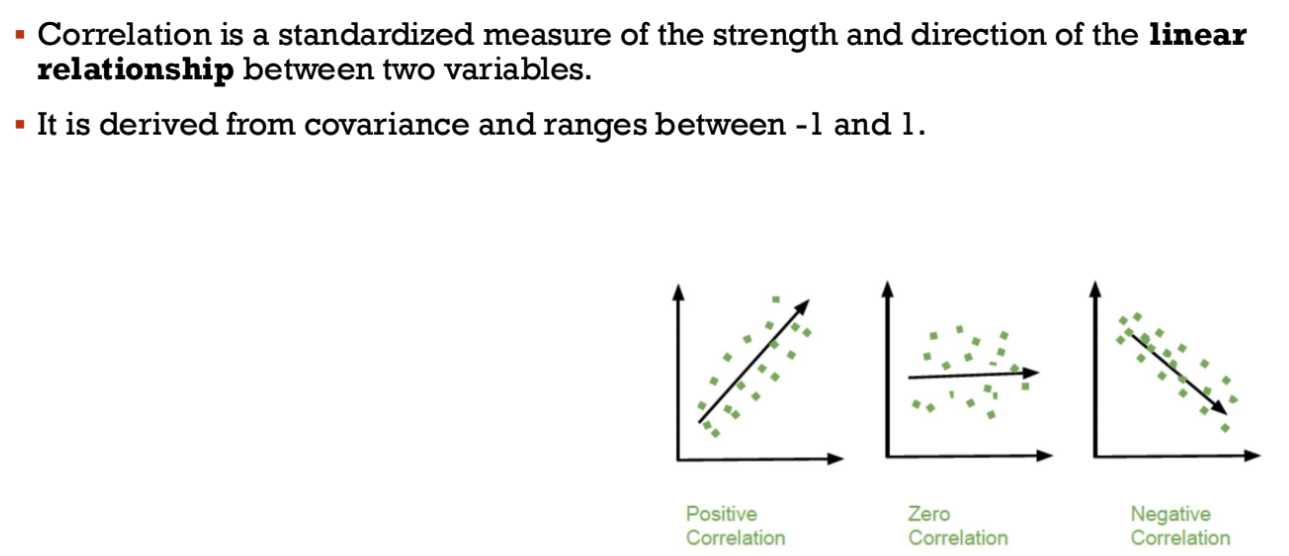

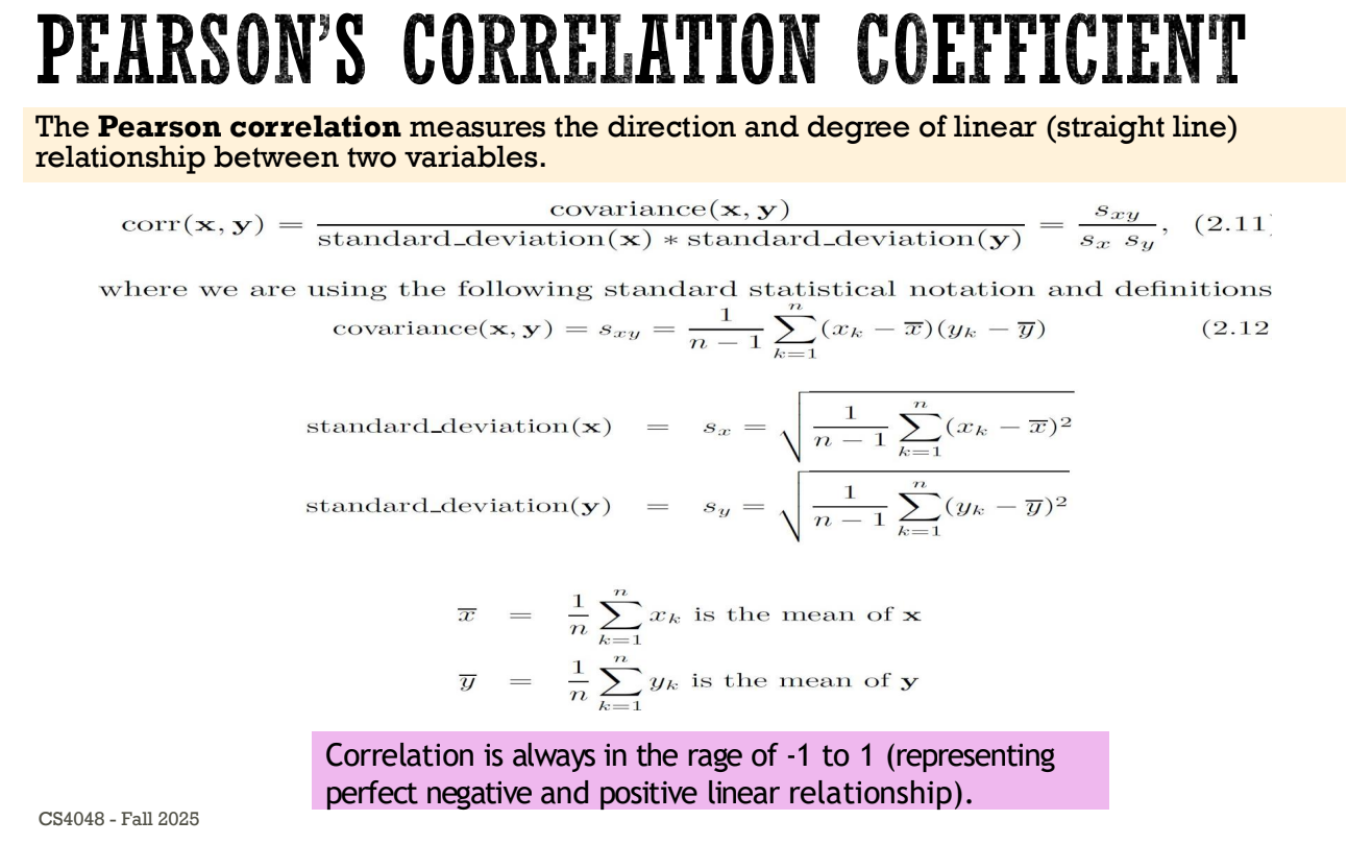

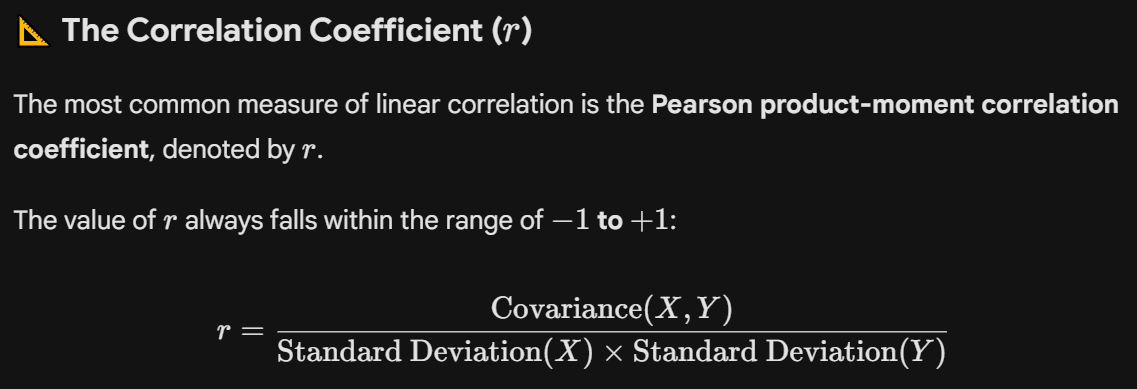

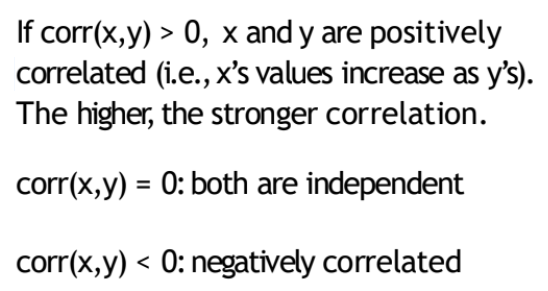

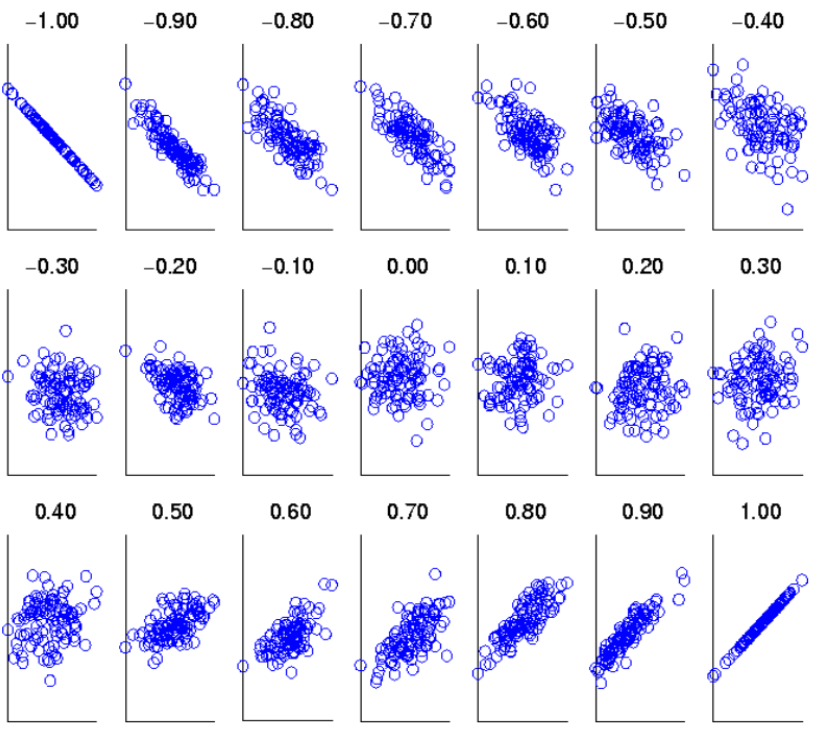

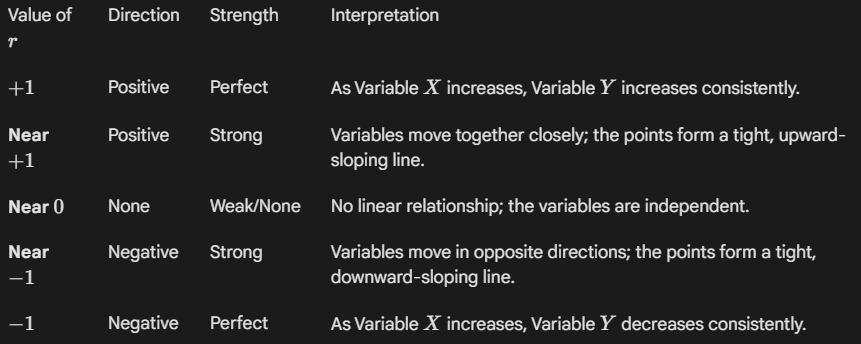

# Spurious Correlation

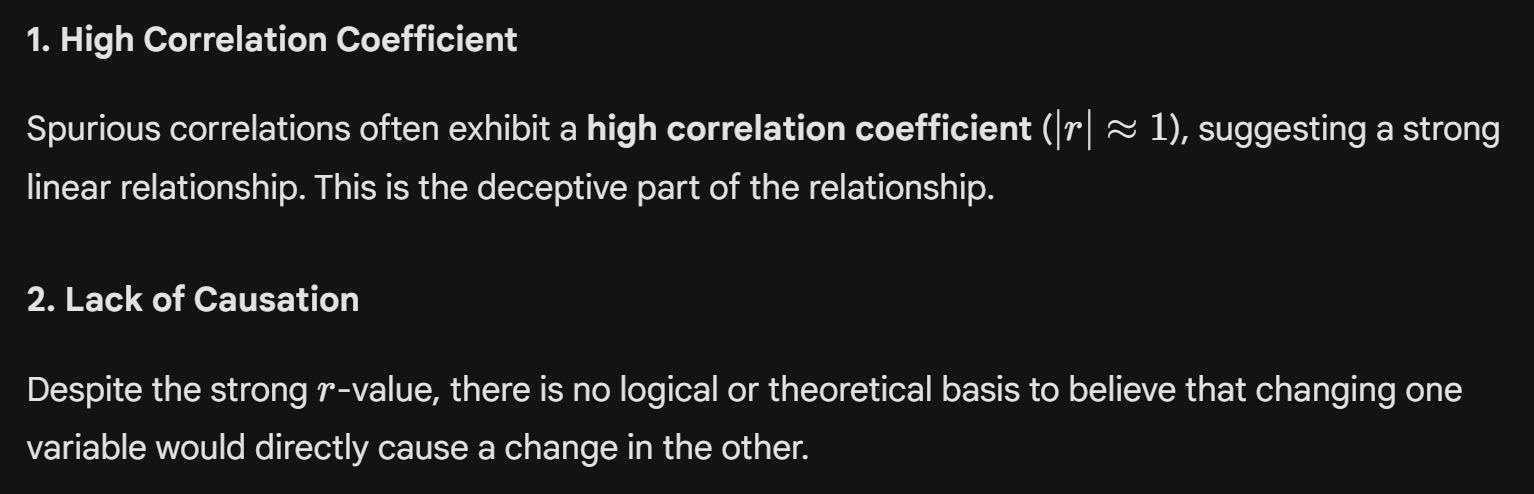

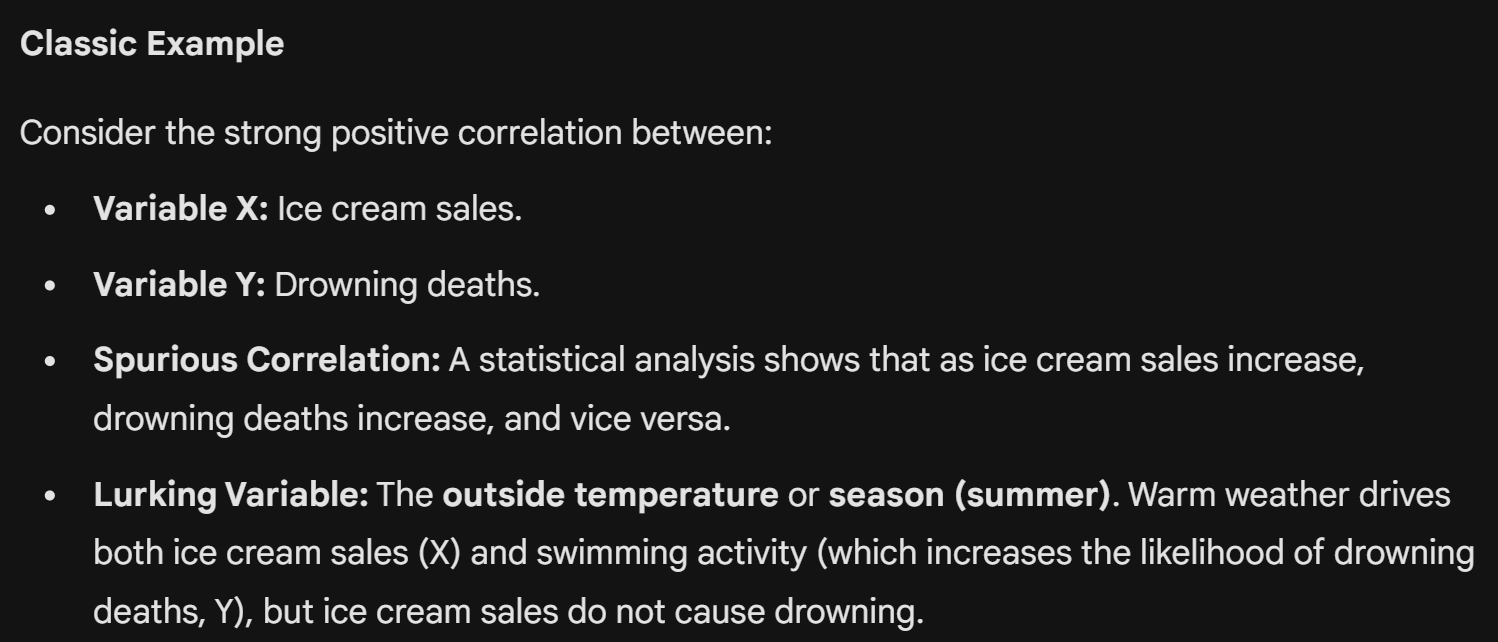

# Problems

## A/B Testing


### Problem 01

We are testing a new website checkout button design.
- Metric: Conversion Rate (Purchases / Visitors).
- Hypothesis: The Challenger (B) button design will increase the conversion rate.
- Significance Level ($\alpha$): 0.05 (95% confidence).

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# --- 1. Simulate A/B Test Data ---
# Traffic was split 50/50 and ran until the minimum sample size was met.

# Group A: Control (Original Button)
visitors_A = 10000
conversions_A = 480
conversion_rate_A = conversions_A / visitors_A

# Group B: Challenger (New Button Design)
visitors_B = 10000
conversions_B = 525
conversion_rate_B = conversions_B / visitors_B

print(f"--- Observed Results ---")
print(f"Control (A) Rate: {conversion_rate_A:.4f} ({conversions_A} / {visitors_A})")
print(f"Challenger (B) Rate: {conversion_rate_B:.4f} ({conversions_B} / {visitors_B})")
print(f"Observed Difference: {conversion_rate_B - conversion_rate_A:.4f}")
print("-" * 30)

# --- 2. Define Hypotheses ---
print(f"--- Hypotheses ---")
print("H₀: p_B = p_A (The rates are the same)")
print("Hₐ: p_B > p_A (The Challenger rate is greater - One-Tailed Test)")
print()

# --- 3. Run the Z-Test for Proportions ---
# Combine the counts and totals into arrays
successes = np.array([conversions_B, conversions_A])
nobs = np.array([visitors_B, visitors_A])

# Use proportions_ztest. We specify alternative='larger' for a one-tailed test
# (testing if p_B is greater than p_A).
z_statistic, p_value = proportions_ztest(count=successes, nobs=nobs, alternative='larger')

# --- 4. Conclusion ---
alpha = 0.05

print(f"--- Statistical Test Results ---")
print(f"Z-Statistic: {z_statistic:.3f}")
print(f"P-Value: {p_value:.5f}")
print(f"Significance Level (α): {alpha}")

if p_value < alpha:
    print("\nDecision: Reject H₀. The result is statistically significant.")
    print("Conclusion: The new button design (Challenger B) performs significantly better.")
else:
    print("\nDecision: Fail to Reject H₀. The result is not statistically significant.")
    print("Conclusion: The new button design does not show a statistically significant difference.")

--- Observed Results ---
Control (A) Rate: 0.0480 (480 / 10000)
Challenger (B) Rate: 0.0525 (525 / 10000)
Observed Difference: 0.0045
------------------------------
--- Hypotheses ---
H₀: p_B = p_A (The rates are the same)
Hₐ: p_B > p_A (The Challenger rate is greater - One-Tailed Test)

--- Statistical Test Results ---
Z-Statistic: 1.457
P-Value: 0.07262
Significance Level (α): 0.05

Decision: Fail to Reject H₀. The result is not statistically significant.
Conclusion: The new button design does not show a statistically significant difference.


### Problem 02
A streaming service wants to know if a change in their Subscription Offer Page (adding a "3 months free" banner) influences the customer's decision to choose the Premium Tier over the Standard Tier.
- Metric: Tier Selection (Categorical: Standard vs. Premium).
- Control (A): Original Offer Page.
- Challenger (B): Page with the "3 months free" banner.
- Null Hypothesis: The Challenger page does not affect the choice of subscription tier (i.e., the variables are independent).
- Alternative Hypothesis: The Challenger page affects the choice of subscription tier (i.e., the variables are dependent).
- Significance Level ($\alpha$): 0.05.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# --- Chi-Square: Test of Independence ---

# --- 1. Create the Observed Data (Contingency Table) ---
# We track 500 new subscribers who were exposed to either A or B.

# Observed Counts:
# Row 1: Control (A)
# Row 2: Challenger (B)
# Column 1: Standard Tier Selection
# Column 2: Premium Tier Selection

observed_data = np.array([
    [320, 180],  # Control (A)
    [280, 220]   # Challenger (B)
])

# Convert to DataFrame for readability
df_contingency = pd.DataFrame(
    observed_data,
    index=['Control (A)', 'Challenger (B)'],
    columns=['Standard Tier', 'Premium Tier']
)

print("--- Observed Contingency Table ---")
print(df_contingency)
print("-" * 40)

# --- 2. Perform the Chi-Square Test ---
# The variables are: Offer Version (Row) and Tier Selection (Column).
chi2, p_value, dof, expected = chi2_contingency(df_contingency)

# --- 3. Calculate Observed Proportions (for context) ---
df_contingency['Total'] = df_contingency.sum(axis=1) # column-wise, horizontal
rate_A = df_contingency.loc['Control (A)', 'Premium Tier'] / df_contingency.loc['Control (A)', 'Total']
rate_B = df_contingency.loc['Challenger (B)', 'Premium Tier'] / df_contingency.loc['Challenger (B)', 'Total']

# --- 4. Output Results ---
alpha = 0.05

print(f"--- Statistical Test Results (Chi-Square) ---")
print(f"Control (A) Premium Rate: {rate_A:.2%}")
print(f"Challenger (B) Premium Rate: {rate_B:.2%}")
print(f"Observed Rate Difference: {(rate_B - rate_A):.2%}")
print(f"\nChi-Square Test Statistic (χ²): {chi2:.3f}")
print(f"P-value: {p_value:.5f}")
print(f"Degrees of Freedom (dof): {dof}")
print(f"Significance Level (α): {alpha}")
print("-" * 40)

# --- 5. Conclusion ---
if p_value < alpha:
    print("Decision: Reject H₀.")
    print("Conclusion: The offer version (A vs. B) and the tier selection are DEPENDENT. The new banner significantly influenced the customers' choice towards the Premium Tier.")
else:
    print("Decision: Fail to Reject H₀.")
    print("Conclusion: The offer version and the tier selection are INDEPENDENT. The new banner did not significantly influence the customers' choice.")

--- Observed Contingency Table ---
                Standard Tier  Premium Tier
Control (A)               320           180
Challenger (B)            280           220
----------------------------------------
--- Statistical Test Results (Chi-Square) ---
Control (A) Premium Rate: 36.00%
Challenger (B) Premium Rate: 44.00%
Observed Rate Difference: 8.00%

Chi-Square Test Statistic (χ²): 6.338
P-value: 0.01182
Degrees of Freedom (dof): 1
Significance Level (α): 0.05
----------------------------------------
Decision: Reject H₀.
Conclusion: The offer version (A vs. B) and the tier selection are DEPENDENT. The new banner significantly influenced the customers' choice towards the Premium Tier.


## Bootstrap Sampling

### Problem 01

Estimating Mean Revenue

Scenario: We have a small sample of daily revenue figures for a new product and want to estimate the true population mean revenue and its $95\%$ confidence interval without assuming the data is normally distributed.

The procedure will follow these steps:
1. Start with a sample of $n$ observations.
2. Draw a random sample of size $n$ with replacement.
3. Calculate the statistic (the mean) for the resample.
4. Repeat many times (1,000 resamples).
5. Construct the confidence interval from the resulting distribution of statistics.

In [ ]:
import numpy as np

# --- 1. The Original Sample ---
# Sample of daily revenue (n=12).
original_sample = np.array([450, 510, 390, 480, 500, 410, 750, 430, 470, 490, 460, 440])
N = len(original_sample)

# --- 2. Parameters ---
B = 1000  # Number of resamples
confidence_level = 0.95
alpha = 1 - confidence_level

# --- 3. The Bootstrapping Loop ---
bootstrap_means = []

# Repeat steps 1-3 many times (1000 resamples)
for i in range(B):
    # Draw a random sample of size n WITH REPLACEMENT
    bootstrap_sample = np.random.choice(
        original_sample,
        size=N,
        replace=True
    )

    # Calculate the statistic (mean) for each bootstrap sample
    mean = np.mean(bootstrap_sample)

    # Add it to the Sampling Distribution of Means
    bootstrap_means.append(mean)

# Convert the results to an array
bootstrap_means = np.array(bootstrap_means)

# --- 4. Calculate Bootstrap Statistics and Confidence Interval ---

# A. Bootstrap Standard Error (Method 5a: variance of the statistic)
# The SE is the standard deviation of the bootstrap sampling distribution.
bootstrap_se = np.std(bootstrap_means)

# B. Confidence Interval (Method 5b: Percentile Method)
# Find the 2.5th and 97.5th percentiles for a 95% CI.
ci_lower = np.percentile(bootstrap_means, (alpha / 2) * 100)
ci_upper = np.percentile(bootstrap_means, (1 - alpha / 2) * 100)

# --- 5. Output Results ---
print(f"Original Sample Mean: ${np.mean(original_sample):.2f}")
print(f"Bootstrap Standard Error (SE): ${bootstrap_se:.2f}")
print("-" * 40)
print(f"{confidence_level*100:.0f}% Confidence Interval for the Mean:")
print(f"  [{ci_lower:.2f}, {ci_upper:.2f}]")

Original Sample Mean: $481.67
Bootstrap Standard Error (SE): $26.42
----------------------------------------
95% Confidence Interval for the Mean:
  [443.33, 540.83]


In [ ]:
# Assuming 'bootstrap_means' is the array of 1000 statistics

sample_mean = np.mean(original_sample) # The original statistic is the point estimate
bootstrap_se = np.std(bootstrap_means) # Calculate the standard error

# Use Z=1.96 for a 95% CI (or Z=2 as suggested in the slide point 5a)
Z = 1.96

ci_lower_bound = sample_mean - (Z * bootstrap_se)
ci_upper_bound = sample_mean + (Z * bootstrap_se)

print(ci_lower_bound)
print(ci_upper_bound)

429.87576117185785
533.4575721614756


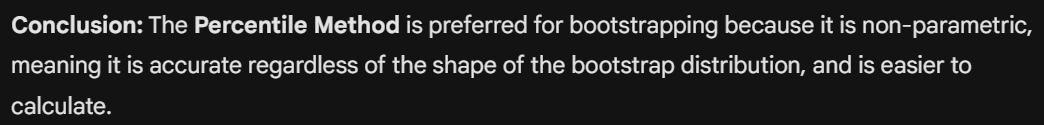

### Problem 02

/tmp/ipython-input-2339639922.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


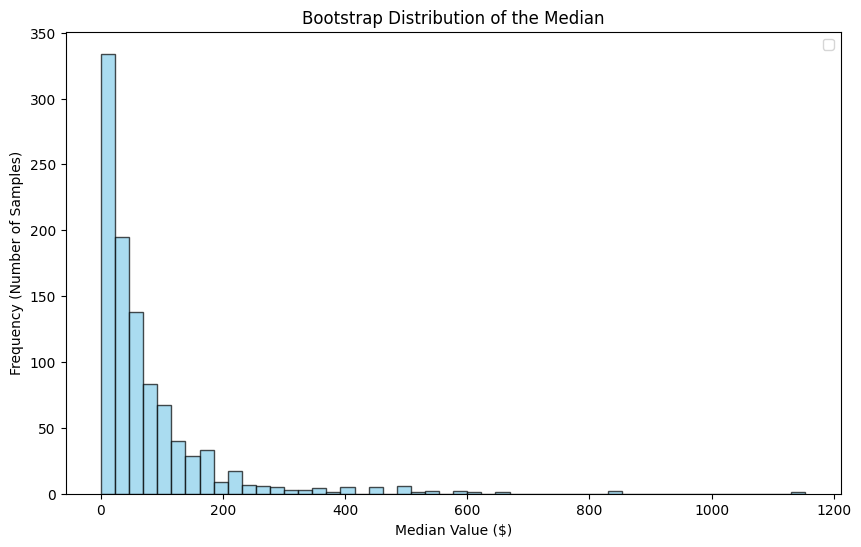

--- Bootstrapping Results (N=1000, B=10000) ---
Original Sample Median: $42.25
Bootstrap Standard Error (SE): $2.12
---------------------------------------------
95% Confidence Interval for the Median:
  [38.56, 46.60]
---------------------------------------------


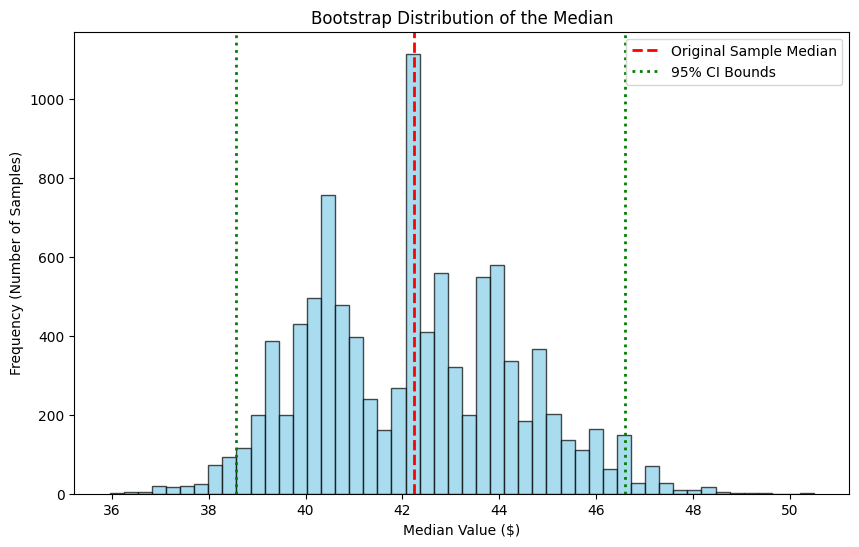

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Create a Non-Normal, Skewed Dataset (Population Proxy) ---
np.random.seed(42)
# Revenue data, highly skewed to the right (many small values, few large ones)
original_sample = np.concatenate([
    np.random.exponential(scale=50, size=800),  # Most data clustered low
    np.random.exponential(scale=200, size=200)   # Few higher values (outliers)
])

plt.figure(figsize=(10, 6))
plt.hist(original_sample, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Bootstrap Distribution of the Median')
plt.xlabel('Median Value ($)')
plt.ylabel('Frequency (Number of Samples)')
plt.legend()
plt.show()

# Total sample size N = 1000
N = len(original_sample)

# --- 2. Define Parameters ---
B = 10000  # Number of bootstrap iterations
confidence_level = 0.95
alpha = 1 - confidence_level

# --- 3. The Bootstrapping Process ---
bootstrap_medians = []

for i in range(B):
    # A. Resample with Replacement
    # Create a new sample of size N by drawing from the original_sample with replacement
    bootstrap_sample = np.random.choice(original_sample, size=N, replace=True)

    # B. Calculate the Statistic
    # Calculate the median of the bootstrap sample
    median = np.median(bootstrap_sample)

    # C. Store the statistic
    bootstrap_medians.append(median)

# Convert the results to a numpy array for easy calculation
bootstrap_medians = np.array(bootstrap_medians)

# --- 4. Calculate Bootstrap Statistics and Confidence Interval ---

# A. Bootstrap Standard Error (Standard deviation of the bootstrap distribution)
bootstrap_se = np.std(bootstrap_medians)

# B. Bootstrap Confidence Interval (Percentile Method)
# Find the percentiles corresponding to the alpha/2 and 1 - alpha/2
lower_percentile = (alpha / 2) * 100
upper_percentile = (1 - alpha / 2) * 100

ci_lower = np.percentile(bootstrap_medians, lower_percentile)
ci_upper = np.percentile(bootstrap_medians, upper_percentile)

# --- 5. Output and Visualization ---
print("--- Bootstrapping Results (N=1000, B=10000) ---")
print(f"Original Sample Median: ${np.median(original_sample):.2f}")
print(f"Bootstrap Standard Error (SE): ${bootstrap_se:.2f}")
print("-" * 45)
print(f"95% Confidence Interval for the Median:")
print(f"  [{ci_lower:.2f}, {ci_upper:.2f}]")
print("-" * 45)

# Optional: Plot the Bootstrap Distribution

# [Image of bootstrap sampling process]

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_medians, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(np.median(original_sample), color='red', linestyle='--', linewidth=2, label='Original Sample Median')
plt.axvline(ci_lower, color='green', linestyle=':', linewidth=2, label='95% CI Bounds')
plt.axvline(ci_upper, color='green', linestyle=':', linewidth=2)
plt.title('Bootstrap Distribution of the Median')
plt.xlabel('Median Value ($)')
plt.ylabel('Frequency (Number of Samples)')
plt.legend()
plt.show()

# Covariance

Scenario

We want to find the covariance between two variables: Hours Studied and the resulting Exam Score for a group of students.

Variable X: Hours Studied.

Variable Y: Exam Score.

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Define the Data ---
# Hours Studied (X)
hours_studied = np.array([5, 8, 3, 10, 6, 4, 9, 7, 2, 11])

# Exam Score (Y)
exam_score = np.array([75, 90, 65, 98, 80, 70, 95, 85, 60, 100])

# Create a DataFrame for organization and calculation
df = pd.DataFrame({
    'Hours_Studied': hours_studied,
    'Exam_Score': exam_score
})

print("--- Data Table ---")
print(df)
print("-" * 40)

# --- 2. Calculate Covariance ---

# NumPy's cov() function returns the Covariance Matrix.
# The covariance between the two variables (X and Y) is found at position [0, 1] or [1, 0].
# The diagonal elements are the variances of the individual variables (Var(X) and Var(Y)).
covariance_matrix = np.cov(hours_studied, exam_score)

# Extract the covariance value between the two variables
covariance_value = covariance_matrix[0, 1]

# --- 3. Output and Interpretation ---

print(f"Covariance Matrix (np.cov):")
print(covariance_matrix)
print("-" * 40)
print(f"Covariance (s_xy) between Hours Studied and Exam Score: {covariance_value:.2f}")

# Interpretation based on the sign
if covariance_value > 0:
    direction = "a Positive"
elif covariance_value < 0:
    direction = "a Negative"
else:
    direction = "a near-zero"

print(f"\nInterpretation:")
print(f"The covariance value is positive, indicating {direction} linear relationship.")
print("This means that as the number of hours studied increases, the exam score tends to increase as well.")

--- Data Table ---
   Hours_Studied  Exam_Score
0              5          75
1              8          90
2              3          65
3             10          98
4              6          80
5              4          70
6              9          95
7              7          85
8              2          60
9             11         100
----------------------------------------
Covariance Matrix (np.cov):
[[  9.16666667  42.55555556]
 [ 42.55555556 199.06666667]]
----------------------------------------
Covariance (s_xy) between Hours Studied and Exam Score: 42.56

Interpretation:
The covariance value is positive, indicating a Positive linear relationship.
This means that as the number of hours studied increases, the exam score tends to increase as well.


## Correlation

Scenario

We want to find the correlation between two variables: Advertising Spend (in thousands of dollars) and Units Sold for a product over ten months.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# --- 1. Define the Data ---
# Advertising Spend (in $1,000s)
advertising_spend = np.array([10, 15, 8, 20, 12, 18, 5, 25, 14, 16])

# Units Sold (in 100s)
units_sold = np.array([105, 160, 90, 210, 140, 175, 70, 240, 150, 165])

# Create a DataFrame for organized viewing
df = pd.DataFrame({
    'Ad_Spend': advertising_spend,
    'Units_Sold': units_sold
})

print("--- Data Table ---")
print(df)
print("-" * 30)

# --- 2. Calculate Correlation ---

# A. Using NumPy's corrcoef (returns a correlation matrix)
correlation_matrix = np.corrcoef(advertising_spend, units_sold)
r_numpy = correlation_matrix[0, 1]

# B. Using Pandas' .corr() method (the most common and simplest method)
r_pandas = df['Ad_Spend'].corr(df['Units_Sold'])

# C. Using SciPy's pearsonr (returns the r-value and the p-value)
r_scipy, p_value_scipy = pearsonr(advertising_spend, units_sold)

# --- 3. Output and Interpretation ---

print(f"Correlation (r) using NumPy: {r_numpy:.4f}")
print(f"Correlation (r) using Pandas: {r_pandas:.4f}")
print(f"Correlation (r) using SciPy: {r_scipy:.4f}")
print("-" * 30)

# Interpretation
if r_pandas >= 0.8:
    strength = "Very Strong Positive"
elif r_pandas >= 0.5:
    strength = "Strong Positive"
else:
    strength = "Moderate/Weak"

print(f"Interpretation:")
print(f"The Pearson correlation coefficient is r = {r_pandas:.4f}.")
print(f"This indicates a {strength} linear relationship: as advertising spend increases, units sold tend to increase.")

--- Data Table ---
   Ad_Spend  Units_Sold
0        10         105
1        15         160
2         8          90
3        20         210
4        12         140
5        18         175
6         5          70
7        25         240
8        14         150
9        16         165
------------------------------
Correlation (r) using NumPy: 0.9925
Correlation (r) using Pandas: 0.9925
Correlation (r) using SciPy: 0.9925
------------------------------
Interpretation:
The Pearson correlation coefficient is r = 0.9925.
This indicates a Very Strong Positive linear relationship: as advertising spend increases, units sold tend to increase.
